<a href="https://colab.research.google.com/github/peterm2007/Peterm2007_ProjectForMsuAI/blob/main/%D0%9B%D0%B8%D0%BA%D0%B2%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B8%D0%BA%D0%B2%D0%BE%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Необходимые импорты и разметка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('/content/drive/MyDrive/Менингит/ОБЪЕДИНЕННАЯ БАЗА - colab.xlsx')
#df = df[df.ВКЛ==1]
#df = df[df['База']!=2]
df = df[df['ВКЛ']==1]
hue = df['№ истории']
print(df.columns)

Index(['Unnamed: 0', 'Дата', 'Код', 'ФИО', '№ истории', 'Отд', 'База',
       'Sample Name', 'p-HPhLA', 'p-HBA', 'p-HPhAA', 'PhPA', 'p-HPhPA', 'PhLA',
       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA', 'IL_6', 'PCT', 'NSE', 'S100',
       'Дата рожд', 'Дата поступления', 'Пол', 'Дата диагноза',
       'Основной диагноз', 'Осложнение', 'Сопутствующие', 'Body temperature',
       'Glasgow coma scale', 'Meningeal signs', 'ИВЛ', 'АБТ',
       'Positive CSF culture', 'Рост в ликворе', 'Рост в мокроте',
       'Рост в крови', 'рост в моче', 'Blood leucocytes count', 'CRB in blood',
       'Blood glucose', 'CSF lactate', 'CSF glucose',
       'Leucocytes count in CSF', 'Lymphocytes in CSF', 'Neutrophiles, %',
       'CSF protein', 'Кровь воспаление', 'Ликвор', 'group', 'Death', 'ВКЛ',
       'Биомаркеры', 'Клиника', 'ПЦР'],
      dtype='object')


In [ ]:
amm = ['p-HPhLA', 'p-HBA', 'p-HPhAA', 'PhPA', 'p-HPhPA', 'PhLA',
       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA', 'IL_6', #'PCT',
       'NSE', 'S100'
       ]
clinic = [ #'Body temperature','Meningeal signs','Positive CSF culture',
          'Blood leucocytes count', 'CRB in blood',
       'Blood glucose',  'CSF glucose',
       'Leucocytes count in CSF', 'Lymphocytes in CSF', 'Neutrophiles, %',
       'CSF protein',]


X = df.loc[:,amm+clinic]
X.loc[:,amm+clinic].head(5)


,p-HPhLA,p-HBA,p-HPhAA,PhPA,p-HPhPA,PhLA,5HIAA,3ILA,3ICA,3IAA,3IPA,IL_6,NSE,S100,Blood leucocytes count,CRB in blood,Blood glucose,CSF glucose,Leucocytes count in CSF,Lymphocytes in CSF,"Neutrophiles, %",CSF protein
0,428.2,36.66,76.80,0.0,0.0,39.88,156.2,7.908,11.120,27.66,2.336,61.41,1.090,0.553,9.1,30.83,4.14,2.8,4.0,63.0,36.0,0.8
1,754.1,55.53,138.10,0.0,0.0,47.38,284.8,12.090,11.530,41.47,7.093,7.49,2.310,0.621,6.5,30.98,7.54,2.3,1.0,100.0,NaN,0.9
2,439.0,36.94,70.27,0.0,0.0,35.86,118.1,8.569,7.621,18.47,6.110,2362.00,3.940,0.792,7.4,25.93,3.32,2.2,4.0,72.0,27.0,1.1
3,245.4,24.84,85.78,0.0,0.0,26.30,0.0,3.422,8.937,22.30,0.000,1.51,0.999,0.191,9.7,33.00,4.72,1.8,8.0,73.0,25.0,0.9
4,502.3,52.35,65.37,0.0,0.0,39.27,0.0,3.573,17.280,11.30,0.000,9.75,0.869,0.198,10.4,9.90,3.98,2.2,1.0,100.0,NaN,0.5


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

df.columns

Index(['Unnamed: 0', 'Дата', 'Код', 'ФИО', '№ истории', 'Отд', 'База',
       'Sample Name', 'p-HPhLA', 'p-HBA', 'p-HPhAA', 'PhPA', 'p-HPhPA', 'PhLA',
       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA', 'IL_6', 'PCT', 'NSE', 'S100',
       'Дата рожд', 'Дата поступления', 'Пол', 'Дата диагноза',
       'Основной диагноз', 'Осложнение', 'Сопутствующие', 'Body temperature',
       'Glasgow coma scale', 'Meningeal signs', 'ИВЛ', 'АБТ',
       'Positive CSF culture', 'Рост в ликворе', 'Рост в мокроте',
       'Рост в крови', 'рост в моче', 'Blood leucocytes count', 'CRB in blood',
       'Blood glucose', 'CSF lactate', 'CSF glucose',
       'Leucocytes count in CSF', 'Lymphocytes in CSF', 'Neutrophiles, %',
       'CSF protein', 'Кровь воспаление', 'Ликвор', 'group', 'Death', 'ВКЛ',
       'Биомаркеры', 'Клиника', 'ПЦР'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
def cleaner(df, alpha):
    df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)
    columns_to_drop = df.columns[df.isnull().sum() > alpha*df.shape[0]]
    print('удалены:', columns_to_drop)
    df_cleaned = df.drop(columns=columns_to_drop)
    return df_cleaned



print(X.info())
imp = KNNImputer()
X = cleaner(X, 0.8)
X = pd.DataFrame(imp.fit_transform(X), columns = X.columns)
print('***********',X[X.isna().any(axis=1)])






<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 127
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   p-HPhLA                  111 non-null    float64
 1   p-HBA                    111 non-null    float64
 2   p-HPhAA                  111 non-null    float64
 3   PhPA                     111 non-null    float64
 4   p-HPhPA                  111 non-null    float64
 5   PhLA                     111 non-null    float64
 6   5HIAA                    111 non-null    float64
 7   3ILA                     111 non-null    float64
 8   3ICA                     111 non-null    float64
 9   3IAA                     111 non-null    float64
 10  3IPA                     111 non-null    float64
 11  IL_6                     111 non-null    float64
 12  NSE                      110 non-null    float64
 13  S100                     109 non-null    float64
 14  Blood leucocytes count   99 non

<ipython-input-82-4500e2ae0da1>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) else x)


In [ ]:
cdc1 = np.where((X.loc[: #y==n
                       ,'Leucocytes count in CSF']>=300), 1, 0)
cdc2 = np.where(X.loc[: #y==n
                      ,'CSF protein']>=1, 1, 0)
cdc3 = np.where(X.loc[: #y==n
                      ,'CSF glucose']<=2.7, 1, 0)
#cdc4 = np.where(X.loc[: #y==n
#                      ,'нф']>=80, 1, 0)

cdc_lab = np.all([cdc1, cdc2, cdc3], axis = 0)
cdc_culture = np.array(X['Positive CSF culture'])
cdc_clinic = np.any([X['Body temperature']>=38, X['Meningeal signs']==1], axis = 0)
cdc = np.any([cdc_culture, np.all([cdc_clinic, cdc_lab], axis = 0)], axis = 0)
y = cdc
cdc.sum()
X['Meningitis'] = np.where(cdc==0, 0, 1)
amm.append('Meningitis')
X = X.loc[:,amm+clinic]
#X.to_excel('Data.xlsx')

KeyError: 'Positive CSF culture'

# PCA и EDA

111 (111, 2)


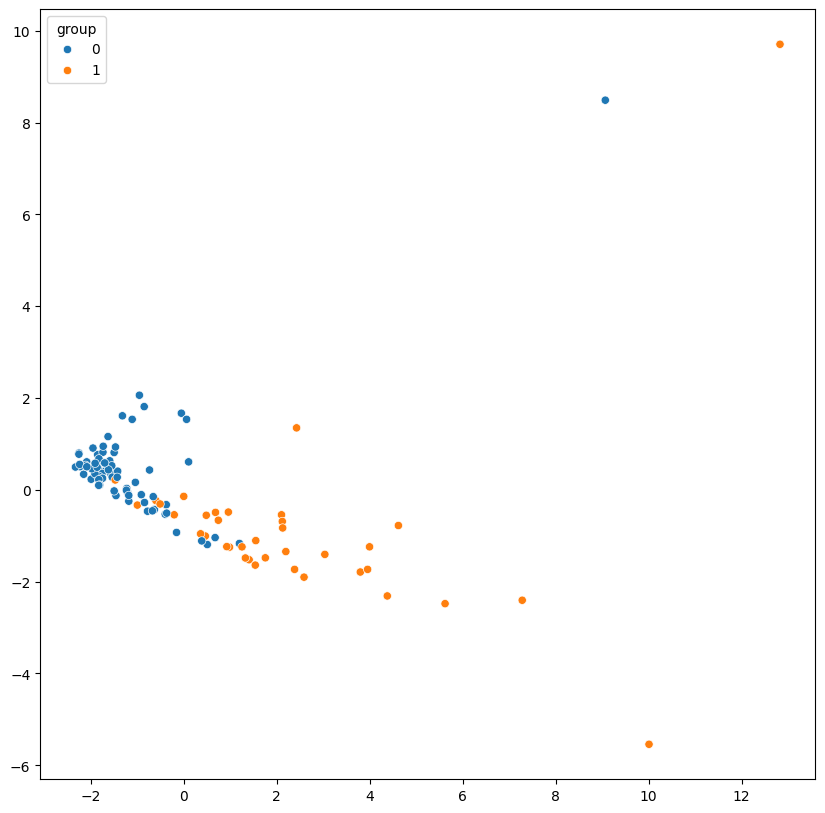

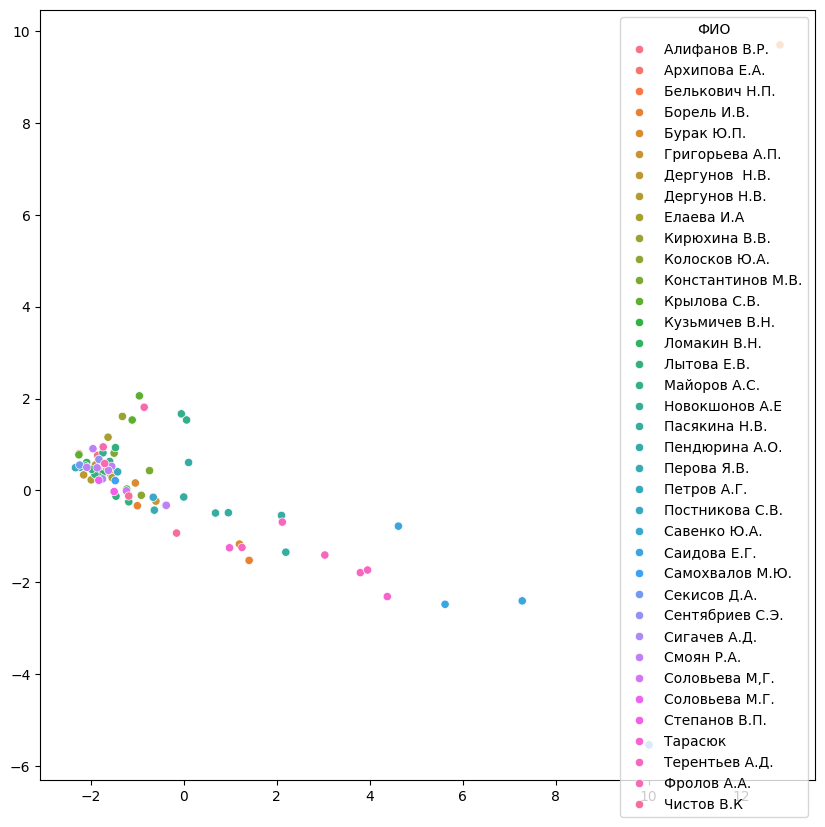

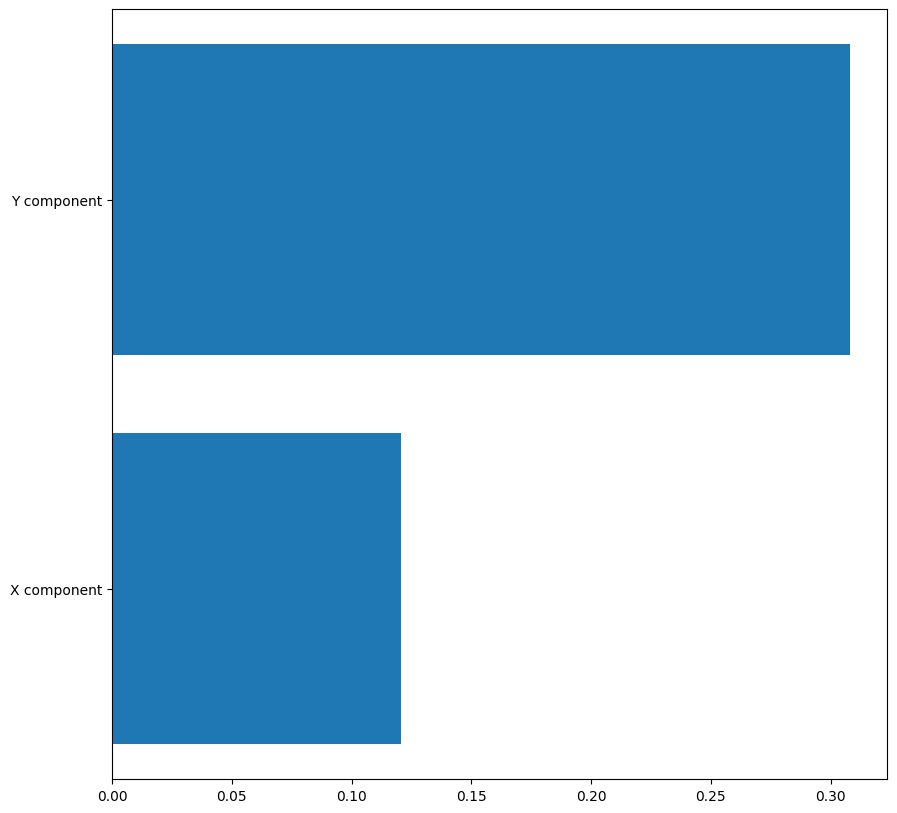

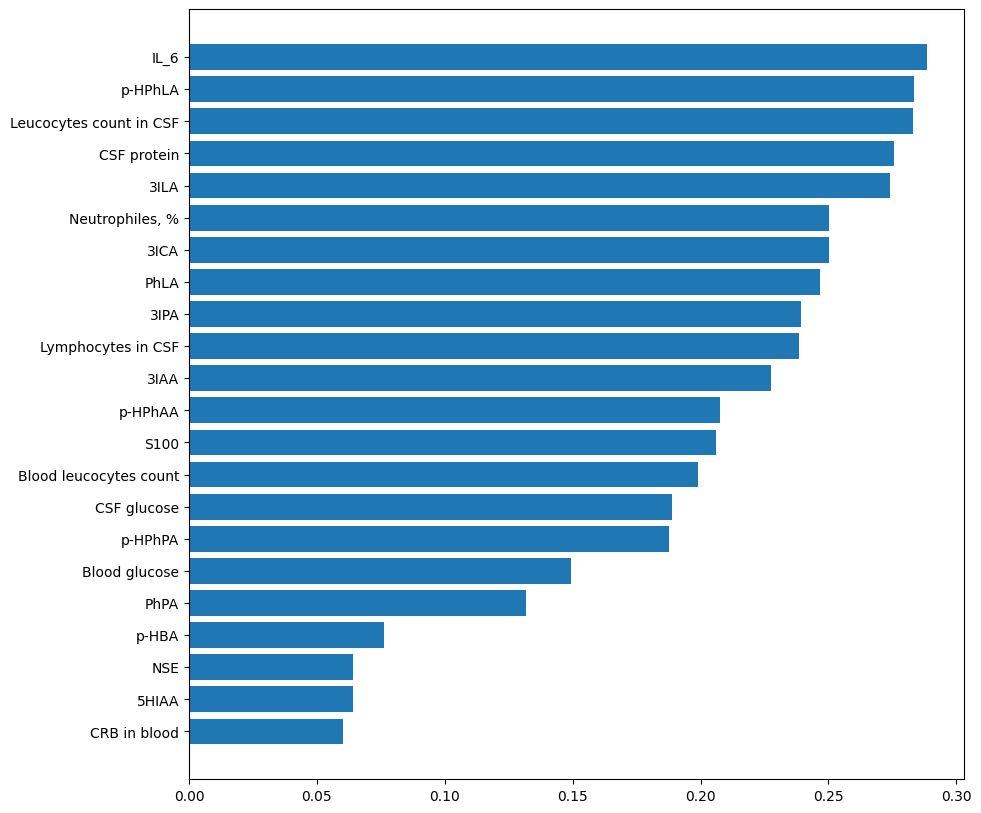

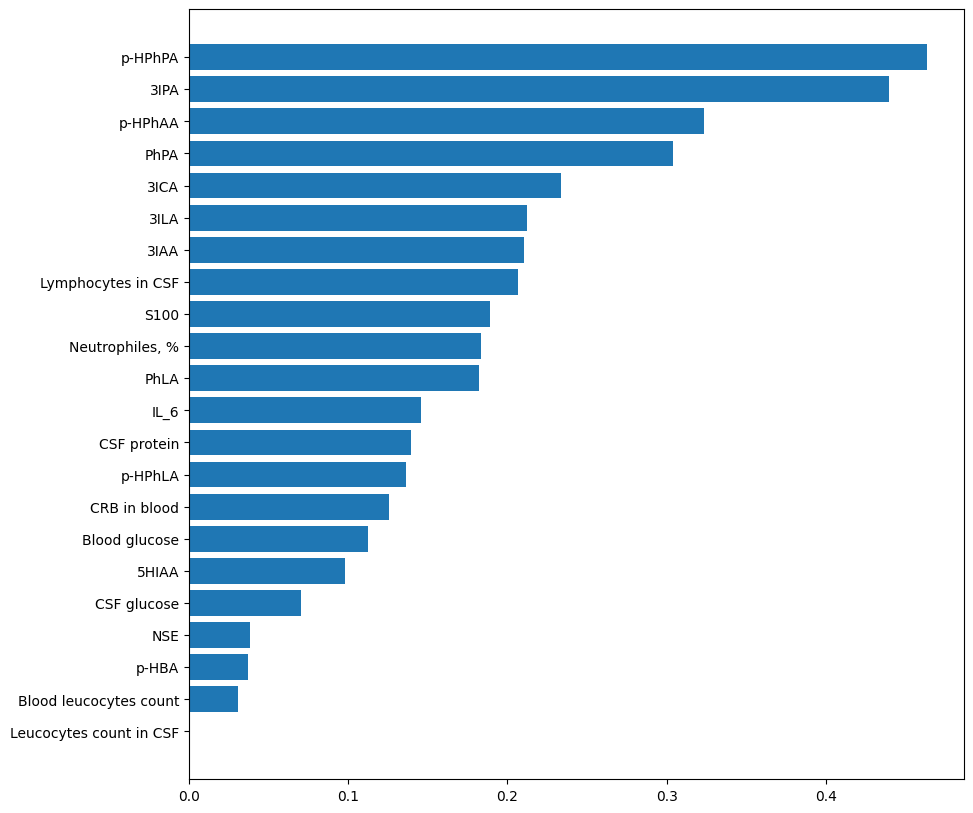

['Борель И.В.' 'Григорьева А.П.' 'Пасякина Н.В.' 'Саидова Е.Г.'
 'Самохвалов М.Ю.' 'Тарасюк' 'Терентьев А.Д.' nan]
38


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
#amm = ['p-HPhLA', 'p-HBA', 'p-HPhAA', 'PhPA', 'p-HPhPA',
#       'PhLA',
#       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA', #'Leucocytes in blood', 'CRP in blood',
#       'IL_6', 'PCT',
#       'NSE', 'S100'
#       ]
#y1 = [i.find('Терен')==-1 for i in df['ФИО']]
#print('*',len(y1))
data = X.loc[:,amm+clinic]
#y = np.array(cdc)+np.array(df.Группа)
#y = np.array(X.loc[:,'инфекции ЦНС'])
#y = np.where(y!=0, 1, 0)
y = df.group
#y = np.array([cdc[i] if (df.ВКЛ[i]==0) else df.ИТОГ[i] for i in range(99)])
#y = cdc
#y = df.Посев
#y = [y!=y1][0]
#print(np.where(y!=0, 1, 0).sum(), y.shape)
#print(data.columns, cdc.shape, df.Группа.shape)
def loadings(importance, ticks=1):
  plt.figure(figsize = (10,10))
  if ticks==1:
    cols = data.columns[np.argsort(importance)]
  else:
    cols=ticks
  importance = np.sort(importance)
  plt.barh(cols, importance)
  plt.xticks(rotation=0)
  plt.show()

pca = PCA(n_components = 2)
sc = StandardScaler()
tr_data = pd.DataFrame(sc.fit_transform(data), columns = data.columns)
#tr_data = data
transformed_data = pca.fit_transform(tr_data)
print(len(y), transformed_data.shape)
plt.figure(figsize = ((10,10)))
sns.scatterplot(x = transformed_data[:,0], y = transformed_data[:,1],hue = y #df['ФИО']
                #, palette = sns.color_palette("hls", 36)
                 )
#plt.xlim([-2,5])
#plt.ylim([-2.5,2.5])
plt.show()
plt.figure(figsize = ((10,10)))
sns.scatterplot(x = transformed_data[:,0], y = transformed_data[:,1],hue =  df.loc[:,'ФИО']
                #, palette = sns.color_palette("hls", 36)
                 )
#plt.xlim([-2,5])
#plt.ylim([-2.5,2.5])
plt.show()

loadings(pca.explained_variance_ratio_, ticks = ['X component', 'Y component'])
loadings(np.abs(pca.components_[0]))
loadings(np.abs(pca.components_[1]))

data = transformed_data

fig = go.Figure()
fig.add_trace(go.Scatter(x = data[y==0, 0], y = data[y==0, 1], mode = 'markers', marker=dict(color = 'green'
        )))
fig.add_trace(go.Scatter(x = data[y==1, 0], y = data[y==1, 1], mode = 'markers', marker=dict(color = 'red')))



fig.show()
print(df[y==1].ФИО.unique())
print(y.sum())


In [ ]:
pd.DataFrame({'IB':df['ФИО'], 'data':frame.iloc[:,0], 'time': df['Дата'], 'y':df['ИТОГ'], 'p-HPhLA>1500':df['p-HPhLA']>1500}).sort_values('data').style

NameError: name 'frame' is not defined

In [ ]:
print(y.sum(), y.shape)

38 (111,)


In [ ]:
#frame = X.loc[:,['3ILA', 'PhLA', 'p-HPhLA']]
frame = pd.DataFrame(StandardScaler().fit_transform(np.log(X.loc[:,amm]+1)), columns = amm)
x = frame.loc[:,'p-HPhLA']
y = frame.loc[:,'IL_6']
z = frame.loc[:,'3IAA']
#frame = frame.loc[frame['3IPA_s']<4000]
#hue = np.append(y, np.linspace(2, 2, donors.loc[donors['3IPA_s']<4000].shape[0])).astype(int)


volume(x, y, z, hue = df.group )

In [ ]:
import plotly.graph_objects as go
import numpy as np




def volume (x, y, z, hue = cdc):
    # Определение цветов для каждой категории
    mask = ['A', 'B', 'C']
    colors = np.array([mask[i] for i in hue])
    color_map = {
        'A': 'green',
        'B': 'red',
        'C': 'blue'
    }

    # Создание списка цветов для точек
    point_colors = [color_map[color] for color in colors]




    observer_position = np.array([0, 0, 3500])
    distances = np.sqrt((x - observer_position[0])**2 + (y - observer_position[1])**2 + (z - observer_position[2])**2)

    # Нормализация расстояний для получения значений прозрачности
    max_distance = np.max(distances)
    opacity = 1 - (distances / max_distance)  # Прозрачность уменьшается с увеличением расстояния

    # Создание списка RGBA цветов для точек
    rgba_colors = []
    for color, op in zip(colors, opacity):
        # Преобразование цвета в RGB
        if color == 'B':
            rgba_colors.append(f'rgba(255, 0, 0, {op})')  # Красный
        elif color == 'A':
            rgba_colors.append(f'rgba(0, 255, 0, {op})')  # Зеленый
        elif color == 'C':
            rgba_colors.append(f'rgba(0, 0, 255, {op})')  # Синий
    # Создание 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=5,
            #color = rgba_colors,
            color=point_colors,  # Цвета точек
            #opacity=0.8,
            line=dict(width=0.5, color='DarkSlateGrey')
        )
    )])

    # Обновление макета графика
    fig.update_layout(
        #title='3D Scatter Plot using Plotly GO',
        scene=dict(
            xaxis_title=frame.columns[0],
            yaxis_title=frame.columns[1],
            zaxis_title=frame.columns[2]
        ),
        width=1600,  # Ширина графика
        height=1200  # Высота графика
    )

    # Отображение графика
    fig.show()

(0, 22)


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning:

divide by zero encountered in log



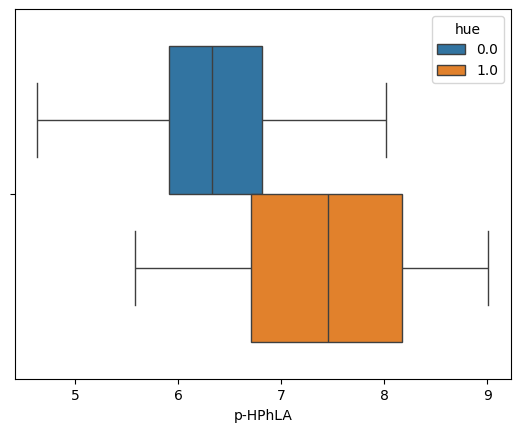

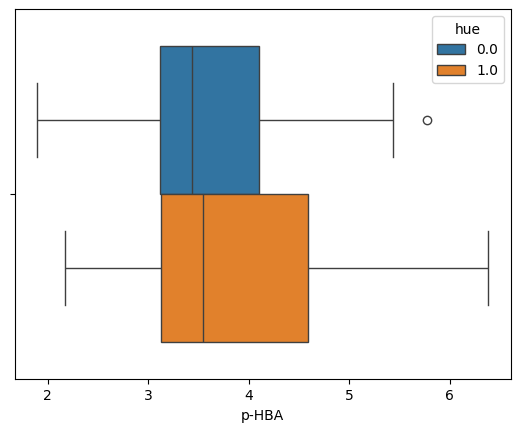

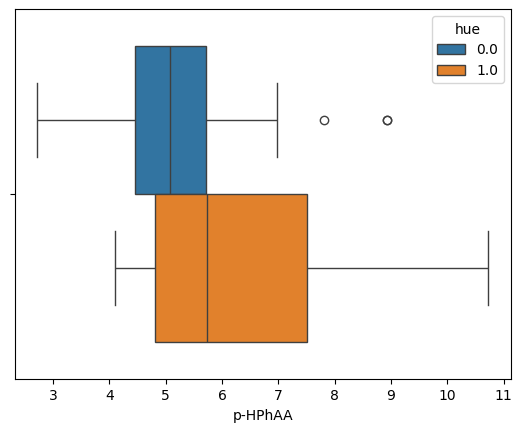

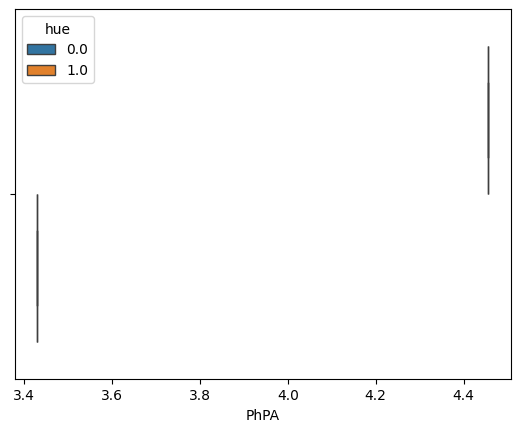

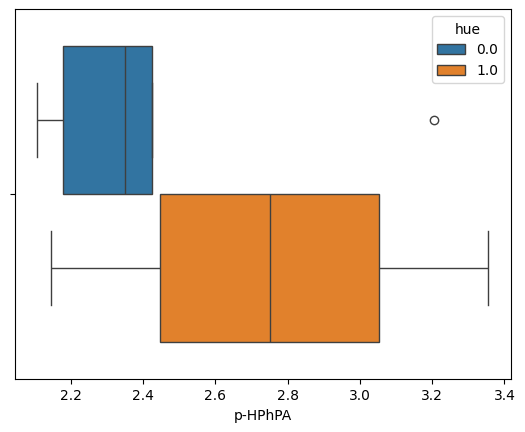

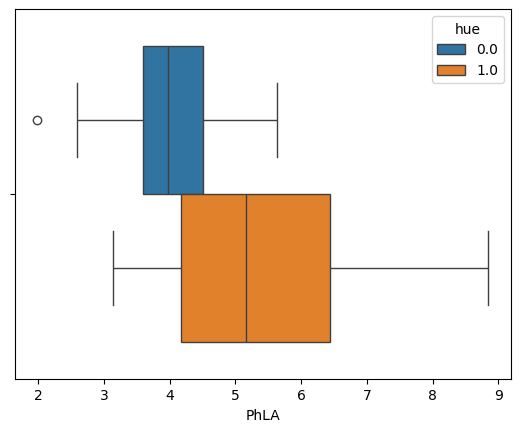

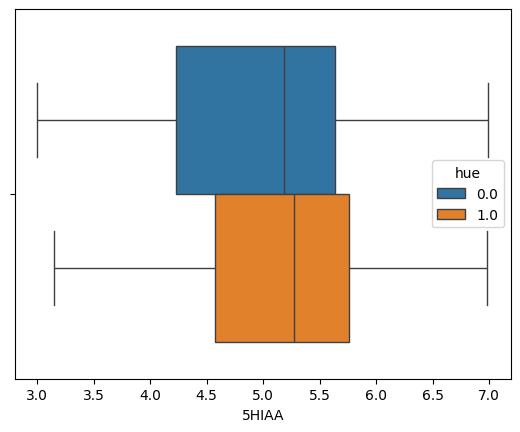

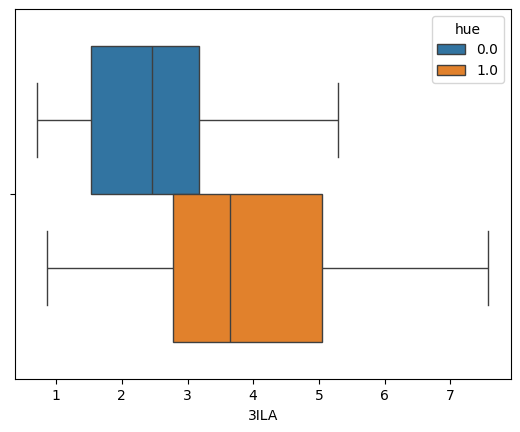

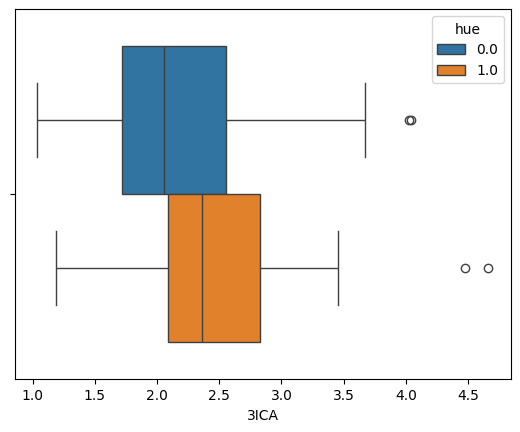

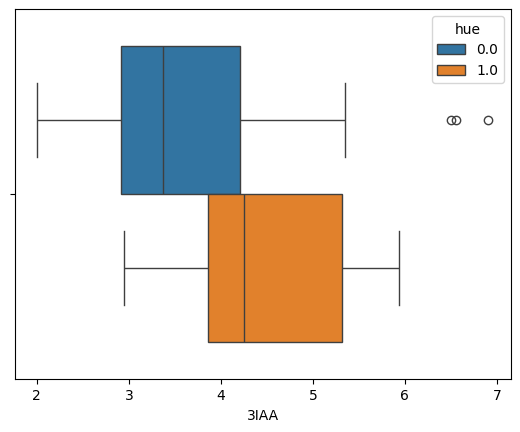

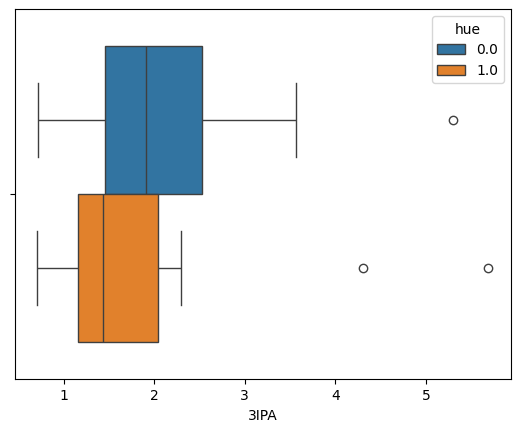

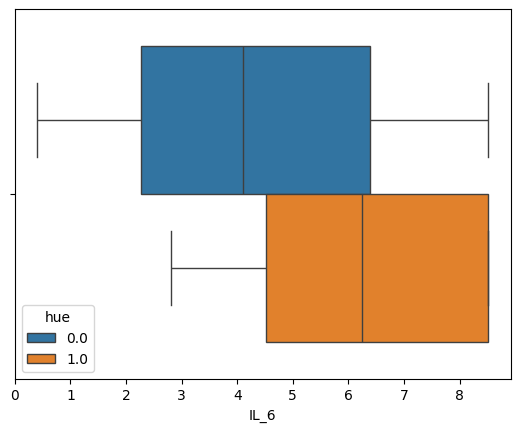

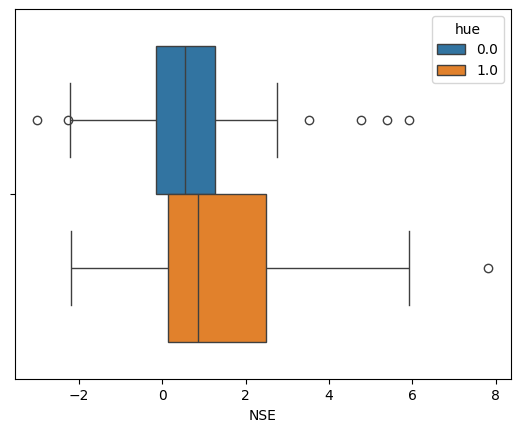

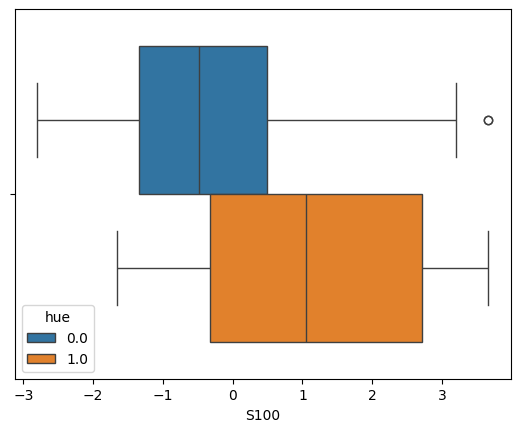

,p-HPhLA,p-HBA,p-HPhAA,PhPA,p-HPhPA,PhLA,5HIAA,3ILA,3ICA,3IAA,...,S100,Blood leucocytes count,CRB in blood,Blood glucose,CSF glucose,Leucocytes count in CSF,Lymphocytes in CSF,"Neutrophiles, %",CSF protein,hue
0,6.059590,3.601686,4.341205,-inf,-inf,3.685875,5.051137,2.067875,2.408745,3.319987,...,-0.592397,2.208274,3.428488,1.420696,1.029619,1.386294,4.143135,3.583519,-0.223144,0.0
1,6.625525,4.016923,4.927978,-inf,-inf,3.858200,5.651787,2.492379,2.444952,3.724970,...,-0.476424,1.871802,3.433342,2.020222,0.832909,0.000000,4.605170,3.806662,-0.105361,0.0
2,6.084499,3.609295,4.252345,-inf,-inf,3.579622,4.771532,2.148151,2.030908,2.916148,...,-0.233194,2.001480,3.255401,1.199965,0.788457,1.386294,4.276666,3.295837,0.095310,0.0
3,5.502890,3.212455,4.451786,-inf,-inf,3.269569,-inf,1.230225,2.190200,3.104587,...,-1.655482,2.272126,3.496508,1.551809,0.587787,2.079442,4.290459,3.218876,-0.105361,0.0
4,6.219198,3.957952,4.180063,-inf,-inf,3.670461,-inf,1.273406,2.849550,2.424803,...,-1.619488,2.341806,2.292535,1.381282,0.788457,0.000000,4.605170,3.673766,-0.693147,0.0


In [ ]:
ftrs = amm
vio = pd.DataFrame(np.log(X))
vio0 = vio[y==0]
vio1 = vio[y==1]
print(np.concatenate([vio0, vio1], axis = 0).shape)
#vio = pd.DataFrame(np.concatenate([vio0, vio1], axis = 0), columns = amm)
vio['hue'] = df.group
for i in ftrs: #amm[:-2]:
   sns.boxplot(data=vio, x = i,# orient='v',
               hue = 'hue')
   plt.show()

vio.head()

# Корреляции и графы

Graph with 10 nodes and 45 edges


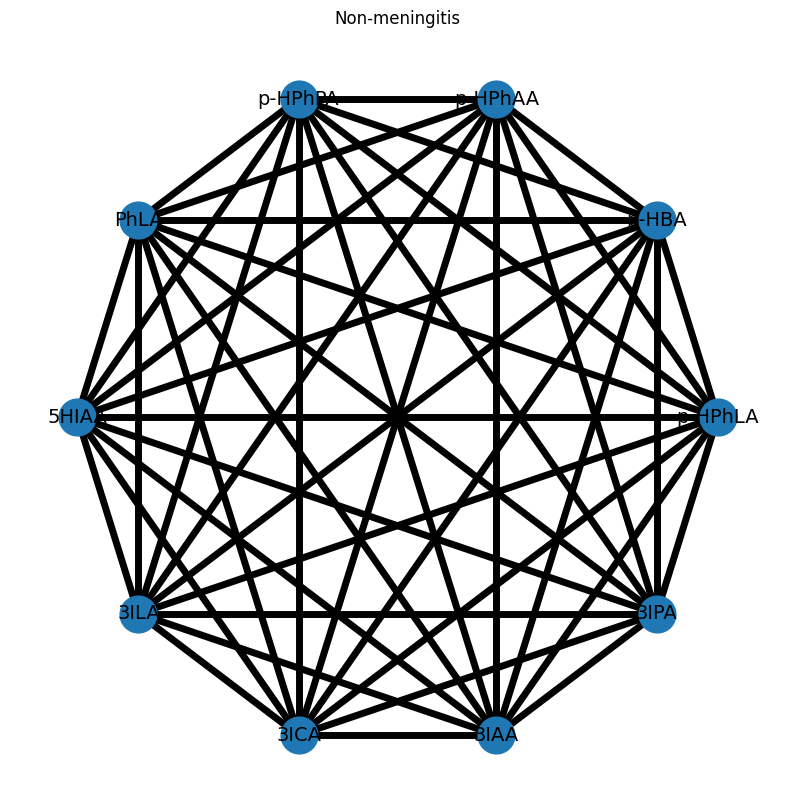

In [ ]:
# @title
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import math

def circle_coordinates(n, lst):
    """Возвращает словарь с координатами равномерно распределённых точек на окружности."""
    r = 1  # радиус окружности
    coords = {}

    for i, key in enumerate(lst):
        # Вычисляем угол в радианах
        theta = 2 * math.pi * i / n
        x = r * math.cos(theta)
        y = r * math.sin(theta)
        coords[key] = (x, y)

    return coords
def plot_correlation_graph(df):
    # Вычисление матрицы корреляции
    corr_matrix = df.corr()

    # Создание графа
    G = nx.Graph()

    # Добавление рёбер в граф с цветами, соответствующими коэффициенту корреляции
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            weight = corr_matrix.iloc[i, j]
            color = sns.color_palette("coolwarm", as_cmap=True)(0.5 + weight / 2)  # Цвет по коэффициенту корреляции
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=weight, color=color)

    # Определение игровых функций для визуализации
    edges = G.edges(data=True)
    colors = [data['color'] for _, _, data in edges]
    weights = [abs(data['weight']) for _, _, data in edges]
    print(G)

    # Рисование графа
    pos = circle_coordinates(len(df.columns), df.columns)
    plt.figure(figsize=[10, 10])
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, width=5, alpha=1, edge_color=colors)
    nx.draw_networkx_labels(G, pos, font_size=14)

    plt.title("Non-meningitis")
    plt.axis('off')  # Выключить оси
    plt.show()
#y = np.concat([y,df[df.База==2].ИТОГ])
plot_correlation_graph(X.loc[y==1,['p-HPhLA', 'p-HBA', 'p-HPhAA', 'p-HPhPA', 'PhLA',
       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA']])

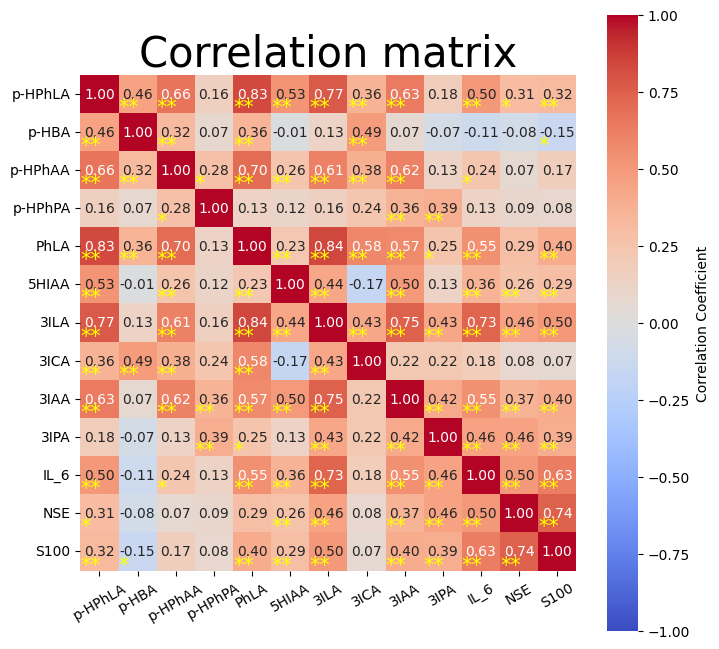

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
amm = ['p-HPhLA', 'p-HBA', 'p-HPhAA', #'PhPA',
       'p-HPhPA',
       'PhLA',
       '5HIAA', '3ILA', '3ICA', '3IAA', '3IPA', 'IL_6', #'PCT',
       'NSE', 'S100'
       ]

def annotate_significance(ax, pval_matrix):
    for i in range(pval_matrix.shape[0]):
        for j in range(pval_matrix.shape[1]):
            if pval_matrix.iloc[i, j] < 0.01:  # уровень значимости 0.05
                ax.text(j, i+1,'**' #f"{pval_matrix.iloc[i, j]:.2f}"
                        ,  color='yellow', fontsize=15)

            elif pval_matrix.iloc[i, j] < 0.05:  # уровень значимости 0.05
                ax.text(j, i+1, '*' #f"{pval_matrix.iloc[i, j]:.2f}"
                        ,  color='yellow', fontsize=15)

            #else:
            #    ax.text(j, i+1,f"{pval_matrix.iloc[i, j]:.2f}"
            #            ,  color='white', fontsize=10)



def corrplotter(k):
   # data = X.loc[y==k, amms]
    data = pd.DataFrame(StandardScaler().fit_transform(np.log(X.loc[:,amm]+1)), columns = amm).loc[:,amm]
   #data = pd.DataFrame(StandardScaler().fit_transform(data), columns = data.columns)

    #data = data.drop(['PhPA_s','PhPA_csf'], axis = 1)

    # Функция для вычисления корреляции и p-значения
    # Вычисление корреляционной матрицы и p-значений
    correlation_matrix = data.corr(method = 'pearson')
    #correlation_matrix = data.corr(method = 'spearman')

    pval_matrix = data.corr(method=lambda x, y: spearmanr(x, y)[1])

    #pval_matrix = data.corr(method=lambda x, y: pearsonr(x, y)[1])
    # Создание маски для значений
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    if k: mask = mask.T
    #pval_matrix =  holm_bonferroni_correction(pval_matrix)
    #pval_matrix = FO(pval_matrix)
    #pval_matrix = pval_matrix*10
    return (correlation_matrix, pval_matrix, mask)


q = 15
p = 20
plt.figure(figsize=((8, 8)))
cm0, pm0, m0 = corrplotter(0)
cm1, pm1, m1 = corrplotter(1)

correlation_matrix = cm0
pval_matrix = pm0
for i in range(pm0.shape[0]):
        for j in range(pm0.shape[1]):
            if m1[i,j]:
              pval_matrix.iloc[i,j] = pm1.iloc[j,i]
              correlation_matrix.iloc[i,j] = cm1.iloc[j,i]


args = {'data':correlation_matrix, 'annot':True, 'fmt':".2f",
                      'cmap': 'coolwarm', 'cbar_kws':{'label': 'Correlation Coefficient'}, 'square':True, 'vmin':-1, 'vmax':1}
ax = sns.heatmap(**args)
plt.xticks(rotation = 30, ha = 'center')
annotate_significance(ax, pval_matrix)
plt.title('Correlation matrix', size = 30)
plt.show()

In [ ]:
!pip install -q phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 8.3 MB/s eta 0:00:00


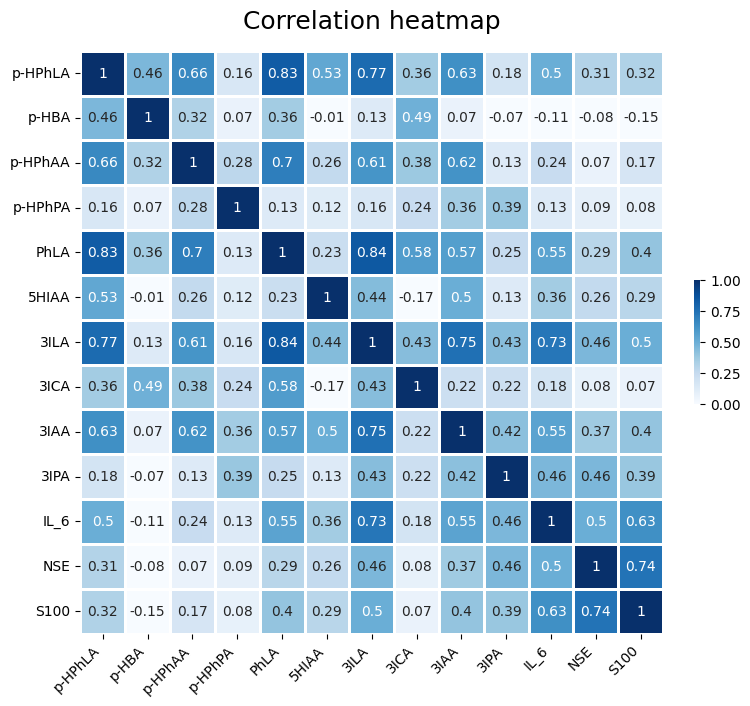

In [ ]:


plt.figure(figsize=(8, 8))
dataset = np.log(X.loc[:,amm]+1) #X.loc[:,amm]
sotred_columns = (
    dataset.corr()
    .round(2)
   # .sort_values("p-HPhLA", ascending=False, axis=1)
    .columns
)

heatmap = sns.heatmap(
    dataset.corr()
    .round(2)
   # .sort_values("p-HPhLA", ascending=False, axis=1)
    .reindex(sotred_columns),
    annot=True,
    square=True,
    cmap="Blues",
    vmax=1,
    vmin=0,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Correlation heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

# **СТАТИСТИКА**

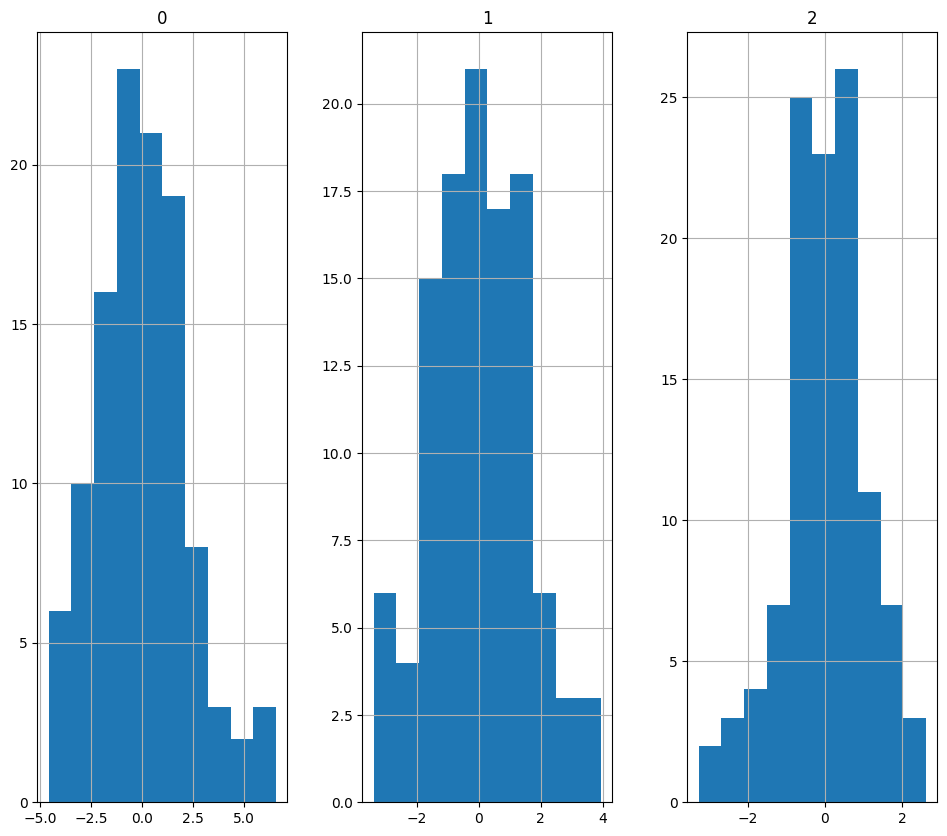

In [ ]:

logged_data = pd.DataFrame(PCA(n_components = 3).fit_transform(StandardScaler().fit_transform(np.log(X.loc[:,amm]+0.01))))
#logged_data = pd.DataFrame(X.loc[:,amm], columns = amm)
#logged_data = pd.DataFrame(np.log(logged_data+1))
logged_data.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

In [ ]:
volume(x = logged_data.iloc[:,0], y = logged_data.iloc[:,1], z = logged_data.iloc[:,2], hue = df.group)

In [ ]:
import scipy.stats as sps
def highlight_max(s, props=''):
    return np.where(s <=0.05, props, '')

def bciq(data, num_samples=1000, alpha=0.05):
    sample_means = []
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        sample_mean = np.mean(bootstrap_sample)
        sample_means.append(sample_mean)

    lower_percentile = (alpha / 2) * 100
    upper_percentile = 100 - lower_percentile
    lb = np.percentile(sample_means, lower_percentile)
    ub = np.percentile(sample_means, upper_percentile)
    mb = np.percentile(sample_means, 50)

    return lb, ub

def smash(x):
  if np.abs(x)<=0.5:
   # x = '<0.5'
   x = f"{x:.2f}"
  else: x = f"{x:.2f}"
  return x

def bci(data):
  lb = np.percentile(data, 25)
  med = data.median()
  ub = np.percentile(data, 75)
  return smash(lb), smash(ub) ,smash(med)

def blink(x):
  return np.sum(x+1)-2*np.sum(x), np.sum(x)


def shap(p, q):
  return sps.shapiro(p).pvalue<0.05 and sps.shapiro(q).pvalue<0.05

data = pd.DataFrame(StandardScaler().fit_transform(np.log(X.loc[:,amm]+0.01)), columns = amm)
y = np.array(df.group)
a = data.loc[y==0, amm]
b = data.loc[y==1, amm]

#feat = donor.columns[1:]
feat = a.columns
print(feat)
#mannwhitneyu
test2 = sps.mannwhitneyu
test1 = sps.ttest_ind
#ans_l  = pd.DataFrame((test(a[i], b[i],alternative = 'less')) for i in feat)
#ans_g  = pd.DataFrame((test(a[i], b[i],alternative = 'greater')) for i in feat)
norm_res = pd.DataFrame([1 if shap(a[i], b[i]) else 0 for i in feat], index = feat) # проверка на нормальность - 0-ttest, 1-mannwhitneyu
ans_ts = pd.DataFrame((test2(a[i], b[i]) if shap(a[i], b[i]) else test1(a[i],b[i]) for i in feat))
#mean_0 = pd.DataFrame([[f"{a[i].median():.2f} ({bci(a[i])[0]:.2f},{bci(a[i])[1]:.2f})" for i in feat]], columns = feat, index = ['median_0'])
#mean_1 = pd.DataFrame([[f"{b[i].median():.2f} ({bci(b[i])[0]:.2f},{bci(b[i])[1]:.2f})" for i in feat]], columns = feat, index = ['median_1'])
mean_0 = pd.DataFrame([[f"{bci(a[i])[2]} ({bci(a[i])[0]},{bci(a[i])[1]})" for i in feat]], columns = feat, index = ['median_0'])
mean_1 = pd.DataFrame([[f"{bci(b[i])[2]} ({bci(b[i])[0]},{bci(b[i])[1]})" for i in feat]], columns = feat, index = ['median_1'])
mean_all = pd.DataFrame([[f"{bci(c[i])[2]} ({bci(c[i])[0]},{bci(c[i])[1]})" for i in feat]], columns = feat, index = ['median_all'])
ans = pd.concat([#ans_l.iloc[:,1], ans_g.iloc[:,1]
                pd.DataFrame([float(f"{i:.2f}") for i in ans_ts.iloc[:,1]])
                 ],
                 axis =1)
ans = pd.DataFrame(np.array(ans.T), columns = feat, index = ['two-sided'])
ans = pd.concat([ mean_all, mean_0, mean_1, ans
                 , norm_res.T
                  ], axis = 0)
#ans = pd.DataFrame(ans, columns = X.columns, index = ['less', 'greater', 'mean_0', 'std_0', 'mean_1', 'std_1'])
rows = ['two-sided']#['less', 'greater']#, 'two-sided']
ans = ans.T
#key = (ans.loc[:,'less']<=0.05) | (ans.loc[:,'greater']<=0.05)
#print(key)
#ans = ans[key]
f = ans.style.apply(highlight_max, props='color:white;background-color:darkblue',subset=pd.IndexSlice[:,rows])
#f = f.format('{:.3f}')
f
#f.to_excel('statistics.xlsx', engine='openpyxl')

Index(['p-HPhLA', 'p-HBA', 'p-HPhAA', 'p-HPhPA', 'PhLA', '5HIAA', '3ILA',
       '3ICA', '3IAA', '3IPA', 'IL_6', 'NSE', 'S100'],
      dtype='object')


,median_all,median_0,median_1,two-sided,0
p-HPhLA,"712.70 (411.65,1455.50)","-0.44 (-0.94,0.09)","1.04 (0.55,1.41)",0.000000,0
p-HBA,"31.27 (21.63,62.41)","-0.20 (-0.53,0.44)","-0.19 (-0.60,0.68)",0.180000,0
p-HPhAA,"172.20 (81.11,380.00)","-0.32 (-0.78,0.10)","0.34 (-0.06,1.35)",0.000000,0
p-HPhPA,"0.00 (0.00,0.00)","-0.28 (-0.28,-0.28)","-0.28 (-0.28,-0.28)",0.590000,1
PhLA,"67.98 (42.19,158.45)","-0.52 (-0.81,-0.21)","0.85 (0.17,1.68)",0.000000,0
5HIAA,"120.20 (40.17,241.10)","0.31 (-0.08,0.54)","0.47 (0.34,0.64)",0.000000,1
3ILA,"15.20 (4.52,39.50)","-0.15 (-0.42,0.21)","0.76 (0.37,1.10)",0.000000,0
3ICA,"9.23 (5.85,13.15)","-0.34 (-0.86,0.39)","0.17 (-0.28,0.48)",0.000000,1
3IAA,"45.58 (23.79,90.92)","-0.53 (-0.91,0.10)","0.58 (0.17,1.19)",0.000000,0
3IPA,"0.00 (0.00,6.43)","-0.92 (-0.92,0.88)","0.82 (-0.92,1.11)",0.020000,1


# Пайплайн

In [ ]:
!pip install -q boruta

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from boruta import BorutaPy
from sklearn.utils import resample
from sklearn.svm import SVC

Index(['p-HPhLA', 'p-HBA', 'p-HPhAA', 'PhLA', '5HIAA', '3ILA', '3ICA', '3IAA',
       '3IPA', 'IL_6', 'NSE', 'S100', 'group'],
      dtype='object')


<Figure size 800x800 with 0 Axes>

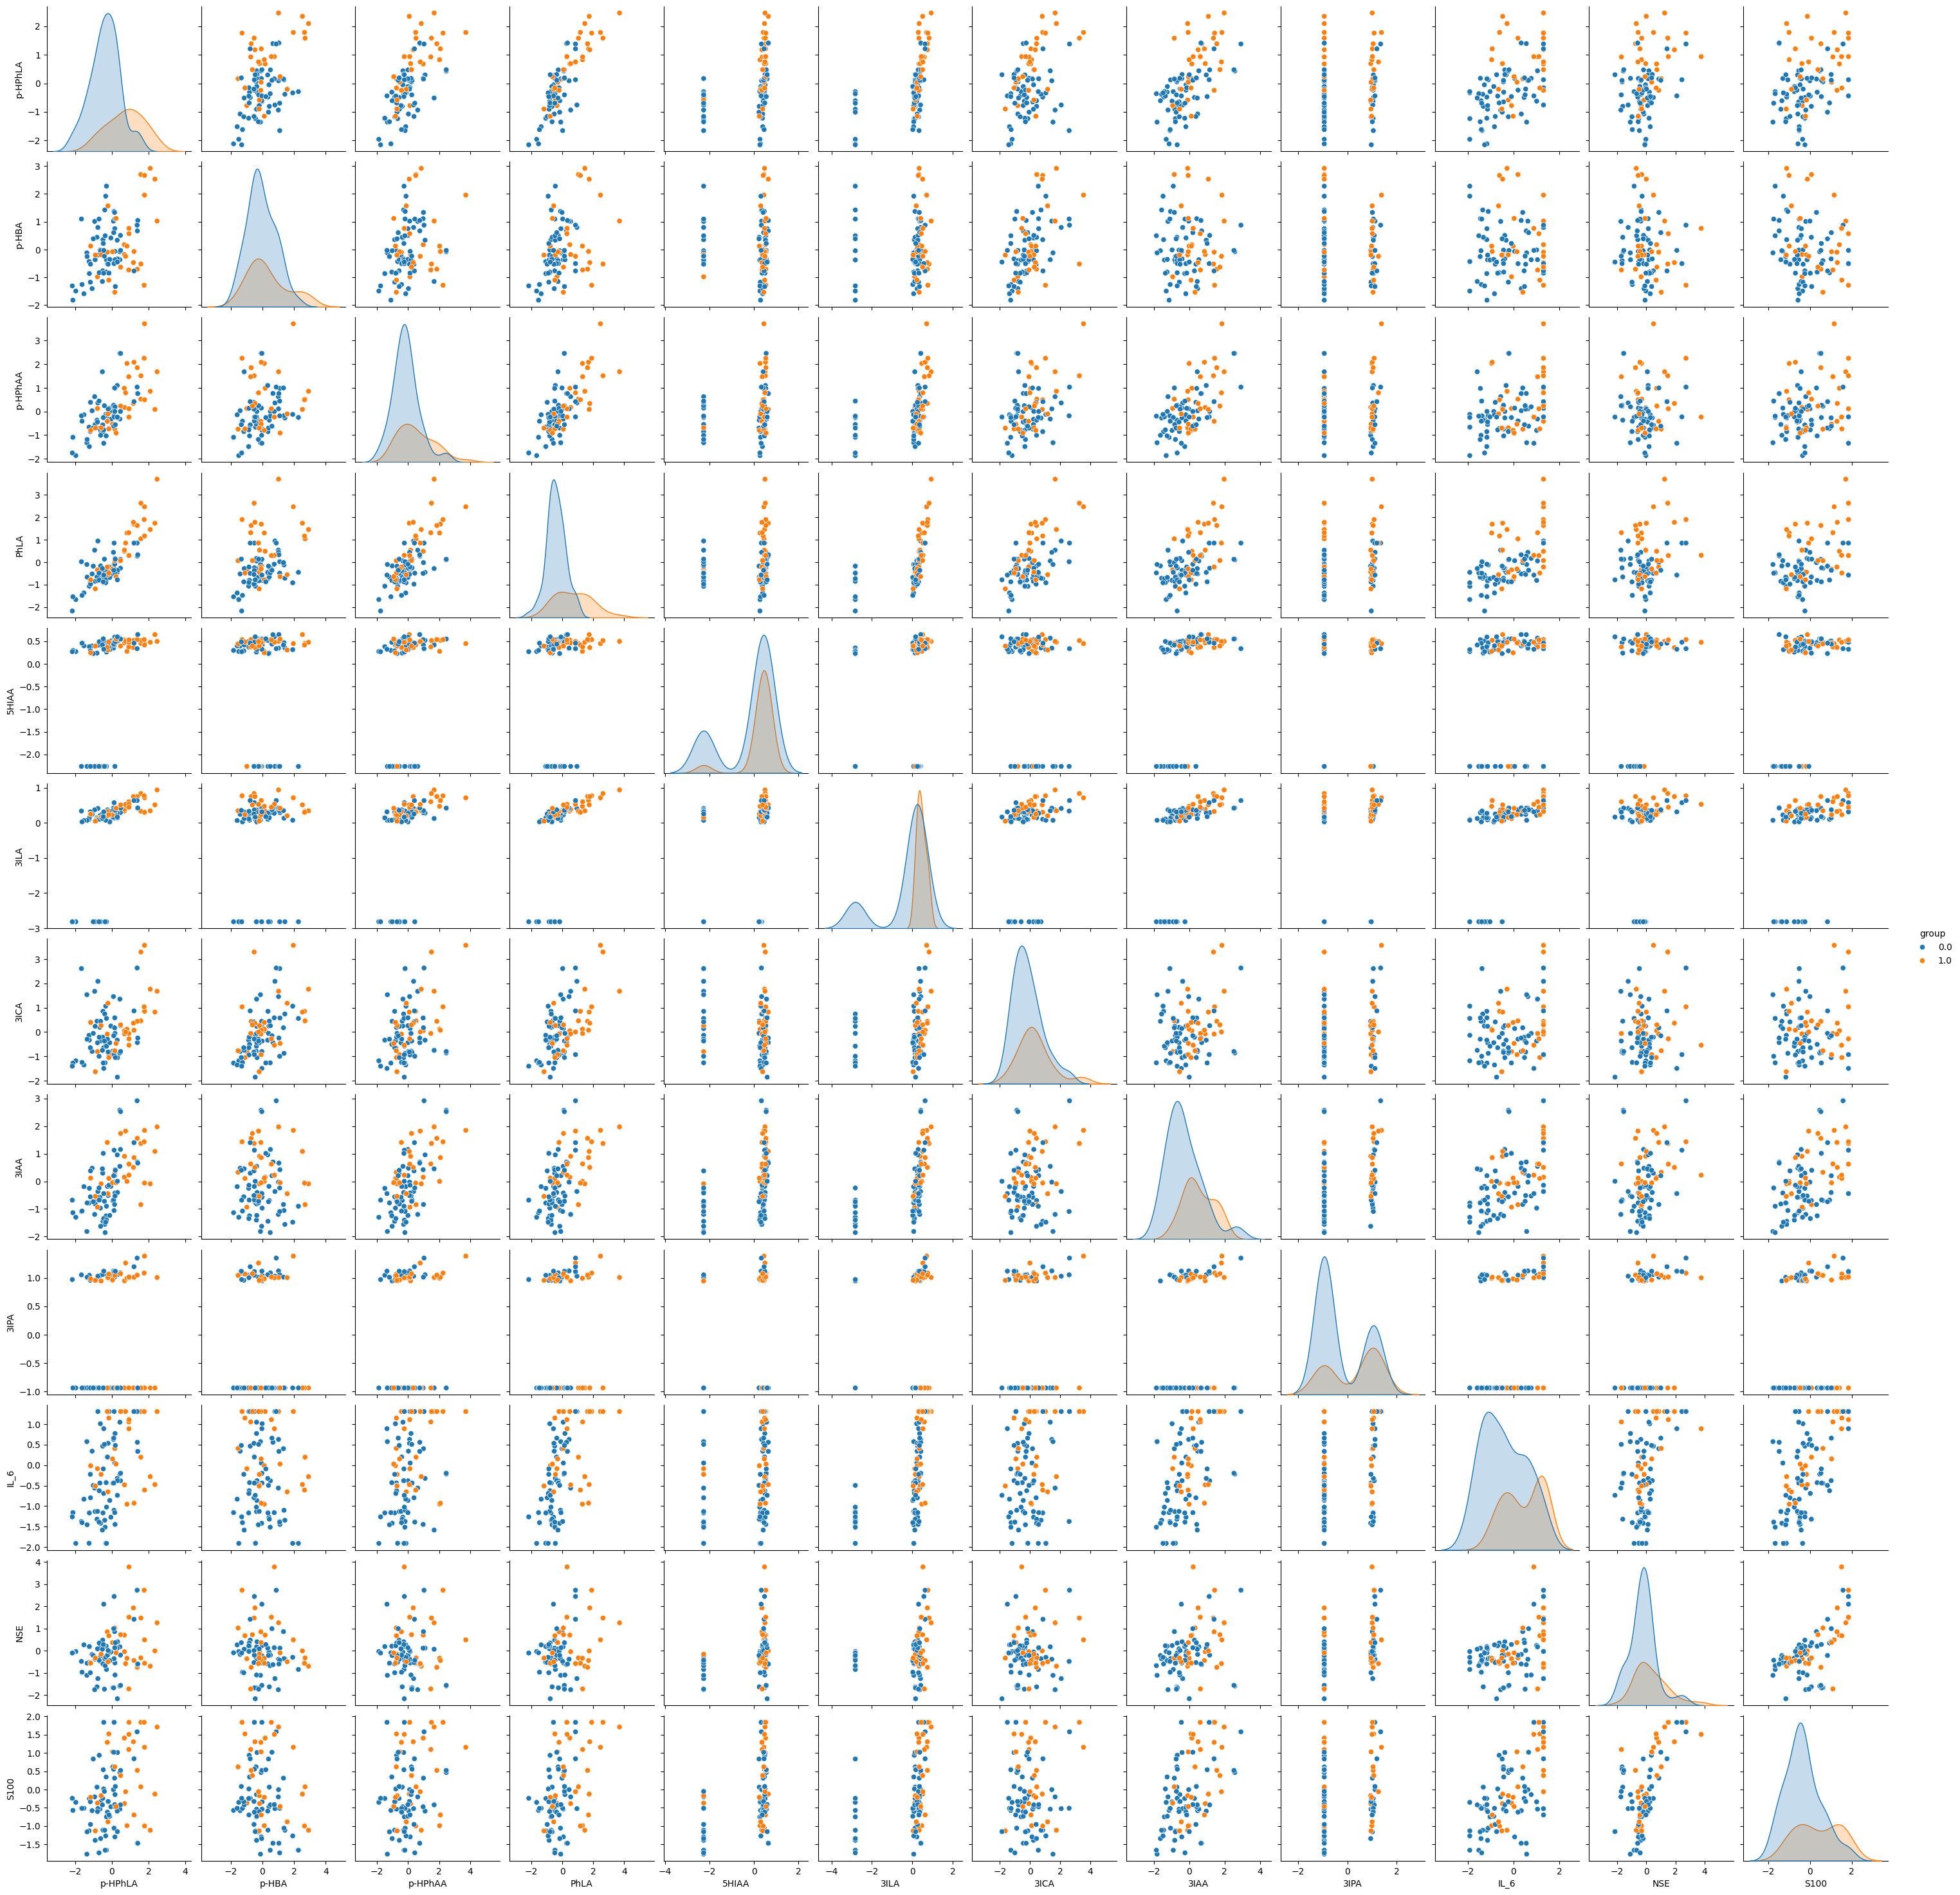

In [ ]:
features = amm
x_data = X
y_data = df.group
epsilon = 1e-9
array = pd.concat([pd.DataFrame(StandardScaler().fit_transform(np.log(x_data.loc[:,features]+epsilon)), columns = features), pd.DataFrame(y_data)], axis = 1)
print(array.columns)
plt.figure(figsize = (8,8))
sns.pairplot(array, hue = 'group')

BorutaSVC

In [ ]:
# @title
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from boruta import BorutaPy
from sklearn.utils import check_random_state, check_X_y
class BorutaSVC(BorutaPy):
    def _get_imp(self, X, y):
        try:
            self.estimator.fit(X, y)
        except Exception as e:
            raise ValueError('Please check your X and y variable. The provided '
                             'estimator cannot be fitted to your data.\n' + str(e))
        try:
            #imp = self.estimator.feature_importances_
            imp = np.abs(self.estimator.coef_[0])
        except Exception:
            raise ValueError('Only methods with feature_importance_ attribute '
                             'are currently supported in BorutaPy.')
        return imp
    def _fit(self, X, y):
        # check input params
        self._check_params(X, y)

        if not isinstance(X, np.ndarray):
            X = self._validate_pandas_input(X)
        if not isinstance(y, np.ndarray):
            y = self._validate_pandas_input(y)

        self.random_state = check_random_state(self.random_state)

        early_stopping = False
        if self.early_stopping:
            if self.n_iter_no_change >= self.max_iter:
                if self.verbose > 0:
                    print(
                        f"n_iter_no_change is bigger or equal to max_iter"
                        f"({self.n_iter_no_change} >= {self.max_iter}), "
                        f"early stopping will not be used."
                    )
            else:
                early_stopping = True

        # setup variables for Boruta
        n_sample, n_feat = X.shape
        _iter = 1
        # early stopping vars
        _same_iters = 1
        _last_dec_reg = None
        # holds the decision about each feature:
        # 0  - default state = tentative in original code
        # 1  - accepted in original code
        # -1 - rejected in original code
        dec_reg = np.zeros(n_feat, dtype=int)
        # counts how many times a given feature was more important than
        # the best of the shadow features
        hit_reg = np.zeros(n_feat, dtype=int)
        # these record the history of the iterations
        imp_history = np.zeros(n_feat, dtype=float)
        sha_max_history = []


        # main feature selection loop
        while np.any(dec_reg == 0) and _iter < self.max_iter:

            # make sure we start with a new tree in each iteration
            if self._is_lightgbm:
                self.estimator.set_params(random_state=self.random_state.randint(0, 10000))
            else:
                self.estimator.set_params(random_state=self.random_state)

            # add shadow attributes, shuffle them and train estimator, get imps
            cur_imp = self._add_shadows_get_imps(X, y, dec_reg)

            # get the threshold of shadow importances we will use for rejection
            imp_sha_max = np.percentile(cur_imp[1], self.perc)

            # record importance history
            sha_max_history.append(imp_sha_max)
            imp_history = np.vstack((imp_history, cur_imp[0]))

            # register which feature is more imp than the max of shadows
            hit_reg = self._assign_hits(hit_reg, cur_imp, imp_sha_max)

            # based on hit_reg we check if a feature is doing better than
            # expected by chance
            dec_reg = self._do_tests(dec_reg, hit_reg, _iter)

            # print out confirmed features
            if self.verbose > 0 and _iter < self.max_iter:
                self._print_results(dec_reg, _iter, 0)
            if _iter < self.max_iter:
                _iter += 1

            # early stopping
            if early_stopping:
                if _last_dec_reg is not None and (_last_dec_reg == dec_reg).all():
                    _same_iters += 1
                    if self.verbose > 0:
                        print(
                            f"Early stopping: {_same_iters} out "
                            f"of {self.n_iter_no_change}"
                        )
                else:
                    _same_iters = 1
                    _last_dec_reg = dec_reg.copy()
                if _same_iters > self.n_iter_no_change:
                    break

        # we automatically apply R package's rough fix for tentative ones
        confirmed = np.where(dec_reg == 1)[0]
        tentative = np.where(dec_reg == 0)[0]
        # ignore the first row of zeros
        tentative_median = np.median(imp_history[1:, tentative], axis=0)
        # which tentative to keep
        tentative_confirmed = np.where(tentative_median
                                       > np.median(sha_max_history))[0]
        tentative = tentative[tentative_confirmed]

        # basic result variables
        self.n_features_ = confirmed.shape[0]
        self.support_ = np.zeros(n_feat, dtype=bool)
        self.support_[confirmed] = 1
        self.support_weak_ = np.zeros(n_feat, dtype=bool)
        self.support_weak_[tentative] = 1

        # ranking, confirmed variables are rank 1
        self.ranking_ = np.ones(n_feat, dtype=int)
        # tentative variables are rank 2
        self.ranking_[tentative] = 2
        # selected = confirmed and tentative
        selected = np.hstack((confirmed, tentative))
        # all rejected features are sorted by importance history
        not_selected = np.setdiff1d(np.arange(n_feat), selected)
        # large importance values should rank higher = lower ranks -> *(-1)
        imp_history_rejected = imp_history[1:, not_selected] * -1

        # update rank for not_selected features
        if not_selected.shape[0] > 0:
                # calculate ranks in each iteration, then median of ranks across feats
                iter_ranks = self._nanrankdata(imp_history_rejected, axis=1)
                rank_medians = np.nanmedian(iter_ranks, axis=0)
                ranks = self._nanrankdata(rank_medians, axis=0)

                # set smallest rank to 3 if there are tentative feats
                if tentative.shape[0] > 0:
                    ranks = ranks - np.min(ranks) + 3
                else:
                    # and 2 otherwise
                    ranks = ranks - np.min(ranks) + 2
                self.ranking_[not_selected] = ranks
        else:
            # all are selected, thus we set feature supports to True
            self.support_ = np.ones(n_feat, dtype=bool)

        self.importance_history_ = imp_history

        # notify user
        if self.verbose > 0:
            self._print_results(dec_reg, _iter, 1)
        return self

In [ ]:
from sklearn.model_selection import StratifiedKFold

x_data = X.loc[:,amm]
y_data = np.array(df.group)
n_splits = 15
epsilon = 1e-9
kf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 40)
model = XGBClassifier(scale_pos_weight = 38/111)
rocs_test = []
rocs_train = []
grid = {'max_depth': [5],
        'min_child_weight': [5,10,15,20],
        'eta': [0.003]
}
for train, test in kf.split(x_data, y_data):
  x_train = x_data.iloc[train]
  x_test = x_data.iloc[test]
  y_train = y_data[train]
  y_test = y_data[test]
  pca = PCA(0.95)
  sc = StandardScaler()
  x_train = pca.fit_transform(sc.fit_transform(np.log(x_train+epsilon)))
  x_test = pca.transform(sc.transform(np.log(x_test+epsilon)))
  #model = XGBClassifier(scale_pos_weight = 111/38)
  #gs = GridSearchCV(model, grid, cv = 3)
  #gs.fit(x_train, y_train)
  #model = gs.best_estimator_
  model = SVC(class_weight = 'balanced')
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  roc_train = roc_auc_score(y_train, y_pred_train)
  roc_test = roc_auc_score(y_test, y_pred_test)
  rocs_train.append(roc_train)
  rocs_test.append(roc_test)
rocs_train = np.array(rocs_train)
rocs_test = np.array(rocs_test)


0.913 (0.892, 0.932), 0.900 (0.678, 1.000)


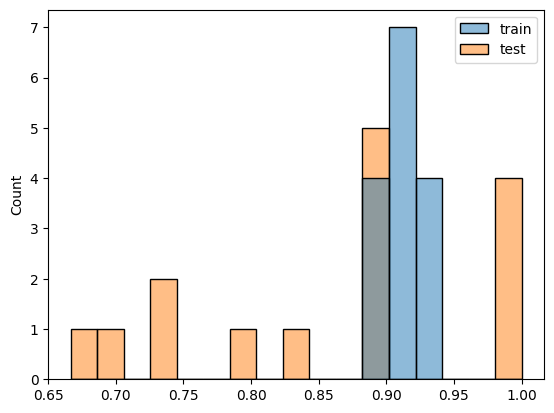

In [ ]:
print(f"{np.median(rocs_train):.3f} ({np.percentile(rocs_train, 2.5):.3f}, {np.percentile(rocs_train, 97.5):.3f}), "
      f"{np.median(rocs_test):.3f} ({np.percentile(rocs_test, 2.5):.3f}, {np.percentile(rocs_test, 97.5):.3f})")
res = pd.DataFrame()
res['train'] = rocs_train
res['test'] = rocs_test
sns.histplot(res)
plt.show()

## **Поиск в KEGG**

In [ ]:
import requests
from collections import deque

def check_enzyme_in_human(enzyme_code):
    """Проверяет, есть ли указанный фермент у человека."""
    url = f"http://rest.kegg.jp/get/{enzyme_code}"
    response = requests.get(url)

    if response.status_code != 200:
        print("Ошибка при обращении к KEGG API")
        return 0  # Фермент не найден или ошибка запроса

    data = response.text

    # Проверяем наличие человека в списке организмов для данного фермента
    if "Homo sapiens" in data:
        return 1  # Фермент найден у человека
    elif 'Klebsiella pneumoniae' in data:
        return 2
    else:
        return 0

def get_reactions_for_compound(compound):
    """Получает все реакции, в которых используется данное соединение."""
    url = f"http://rest.kegg.jp/link/reaction/{compound}"
    response = requests.get(url)
    if response.status_code != 200:
        print("Ошибка при обращении к KEGG API", compound)
        #return []
    reactions = response.text.splitlines()
    if len(reactions)>10:
      compound_reactions = []
    else:
      compound_reactions = [line.split('\t')[1] for line in reactions]
    return compound_reactions

blacklist = ['C0000'+str(i) for i in range(10)]
blacklist.append('C00080')
for i in range(10,20):
    blacklist.append(['C000'+ str(i)][0])
print(blacklist)

def get_enzyme_and_products(reaction):
    """Получает информацию о ферменте и продуктах реакции."""
    url = f"http://rest.kegg.jp/get/{reaction}"
    response = requests.get(url)

    if response.status_code != 200:
        return None, None  # Ошибка при запросе

    data = response.text
    enzyme = None
    products = []

    for line in data.splitlines():
        #print(line)
        if line.startswith("ENZYME"):
            enzyme = line.split()[1]  # Код фермента
        elif line.startswith("EQUATION"):
            #print(line)
            arr = line.split()
            arr = arr[arr.index('<=>'):]
            arr = np.array(arr)[np.where([((('C' in arr[i])==True) and ((arr[i] in blacklist)==False)) for i in range(len(arr))], True, False)]

            #print(arr)
           # print('EQUATION: ',arr)
    products = arr  # Код продукта
    #print(enzyme, products)

    return enzyme, products

def get_compound_name(compound_code):
    """Получает название соединения по его коду."""
    url = f"http://rest.kegg.jp/get/{compound_code}"
    response = requests.get(url)

    if response.status_code != 200:
        return None  # Ошибка при запросе

    data = response.text
    for line in data.splitlines():
        if line.startswith("NAME"):
            return line.split(maxsplit=1)[1].strip()  # Название соединения

    return None  # Если название не найдено

def breadth_first_search(compound1, compound2, max_length):
    """Ищет последовательность превращений с помощью поиска в ширину."""
    queue = deque([(compound1, [], 0)])  # (текущее соединение, последовательность, длина)
    visited = set([compound1])

    while queue:
        current_compound, path, length = queue.popleft()
       # print(current_compound, ': ', get_compound_name(current_compound))

        if length > max_length:

            continue  # Превышение максимальной длины

        if current_compound == compound2:

            return path  # Возвращаем путь, если достигли конечного соединения

        reactions = get_reactions_for_compound(current_compound)
       # print(reactions)

        for reaction in reactions:
            enzyme, products = get_enzyme_and_products(reaction)
            if enzyme:  # Проверяем, есть ли фермент
                for product in products:
                    if product not in visited:
                        visited.add(product)
                        new_path = path + [(enzyme, current_compound, product)]
                        queue.append((product, new_path, length + 1))

    return None  # Если не нашли путь

def find_transformation(compound1, compound2, n):
    result = breadth_first_search(compound1, compound2, n)
    if result is None:
        return "NO"

    return result

# Пример использования:
#compound2 = 'C22006'  # Код первого соединения
#compound1 = 'C22236'  # Код второго соединения
n = 5  # Максимальная длина
compounds = ['C03964', 'C00156', 'C00642', 'C05629', #'C10447',
             'C05607', 'C05635', 'C22006', 'C19837', 'C00954', 'C22236']
for compound1 in compounds:
  for compound2 in compounds:#[compounds.index(compound1):]

    if compound1!=compound2:
        result = find_transformation(compound1, compound2, n)

        if result == "NO":
            print(f"{compound1}, {compound2}, {result}")
        else:
            # Получаем названия веществ
            compound1_name = get_compound_name(compound1)
            compound2_name = get_compound_name(compound2)

            print(f"Преобразование: {compound1_name} ({compound1}) -> {compound2_name} ({compound2})")
            for enzyme, start, product in result:
                start_name = get_compound_name(start)
                product_name = get_compound_name(product)
                enzyme_name = get_compound_name(enzyme)  # Вызываем для фермента
                print(f"Фермент: {enzyme_name, enzyme, check_enzyme_in_human(enzyme)}, Превращение: {start_name} ({start}) -> {product_name} ({product})")

['C00000', 'C00001', 'C00002', 'C00003', 'C00004', 'C00005', 'C00006', 'C00007', 'C00008', 'C00009', 'C00080', 'C00010', 'C00011', 'C00012', 'C00013', 'C00014', 'C00015', 'C00016', 'C00017', 'C00018', 'C00019']
C03964, C00156, NO
C03964, C00642, NO
C03964, C05629, NO
C03964, C05607, NO
C03964, C05635, NO
C03964, C22006, NO
C03964, C19837, NO
C03964, C00954, NO
C03964, C22236, NO
C00156, C03964, NO
C00156, C00642, NO
C00156, C05629, NO
C00156, C05607, NO
C00156, C05635, NO
C00156, C22006, NO
C00156, C19837, NO
C00156, C00954, NO
C00156, C22236, NO
C00642, C03964, NO
C00642, C00156, NO
C00642, C05629, NO
C00642, C05607, NO
C00642, C05635, NO
C00642, C22006, NO
C00642, C19837, NO
C00642, C00954, NO
C00642, C22236, NO
C05629, C03964, NO
C05629, C00156, NO
C05629, C00642, NO
C05629, C05607, NO
C05629, C05635, NO
C05629, C22006, NO
C05629, C19837, NO
C05629, C00954, NO
C05629, C22236, NO
C05607, C03964, NO
C05607, C00156, NO
C05607, C00642, NO
C05607, C05629, NO
C05607, C05635, NO
C05607, C2

IndexError: list index out of range

['rn:R03337', 'rn:R03339', 'rn:R08766', 'rn:R12492']

('1.1.1.110', [])